##### Download the sample audio files 

In [42]:
!test ! -f "master.zip" && wget "https://github.com/karoldvl/ESC-50/archive/master.zip"


--2023-03-02 16:57:17--  https://github.com/karoldvl/ESC-50/archive/master.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/karolpiczak/ESC-50/archive/master.zip [following]
--2023-03-02 16:57:18--  https://github.com/karolpiczak/ESC-50/archive/master.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/karolpiczak/ESC-50/zip/refs/heads/master [following]
--2023-03-02 16:57:18--  https://codeload.github.com/karolpiczak/ESC-50/zip/refs/heads/master
Resolving codeload.github.com (codeload.github.com)... 140.82.113.9
Connecting to codeload.github.com (codeload.github.com)|140.82.113.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip’

master.zip              [<=>  

###### Unzip the sample audio files

In [43]:
!unzip -qq master.zip


In [1]:
import pandas as pd
import librosa
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
from tqdm import tqdm_notebook as tqdm
import os

#### Read the Metadata of the sample image folder

In [8]:
def spec_to_image(spec, eps=1e-6):
  mean = spec.mean()
  std = spec.std()
  spec_norm = (spec - mean) / (std + eps)
  spec_min, spec_max = spec_norm.min(), spec_norm.max()
  spec_scaled = 255 * (spec_norm - spec_min) / (spec_max - spec_min)
  spec_scaled = spec_scaled.astype(np.uint8)
  return spec_scaled

In [10]:
def get_melspectrogram_db(file_path, sr=None, n_fft=2048, hop_length=512, n_mels=128, fmin=20, fmax=8300, top_db=80):
  wav,sr = librosa.load(file_path,sr=sr)
  if wav.shape[0]<5*sr:
    wav=np.pad(wav,int(np.ceil((5*sr-wav.shape[0])/2)),mode='reflect')
  else:
    wav=wav[:5*sr]
  spec=librosa.feature.melspectrogram(y=wav, sr=sr)
  spec_db=librosa.power_to_db(spec,top_db=top_db)
  return spec_db

In [69]:
!pwd

/mnt/batch/tasks/shared/LS_root/mounts/clusters/yuexinmao1/code/Users/yuexinmao/collectioin-ym/Exxon-audio/ESC-50-master


### Load File and Play Sound

In [16]:
filepath =  './sample/5-200461-B-11.wav'

In [15]:
y, sr = librosa.load(filepath)
print(f'Sampling rate of the audio is {sr} and length of the audio is {len(y)/sr} seconds')

from IPython.display import Audio
Audio(data=y, rate=sr)

Sampling rate of the audio is 22050 and length of the audio is 5.0 seconds


### Generate the wave plot

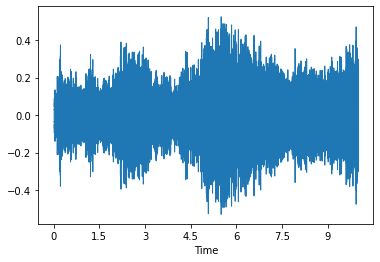

In [6]:
wav, sr = librosa.load(filepath, sr=None)
librosa.display.waveshow(wav)

### Generate the spectrogram

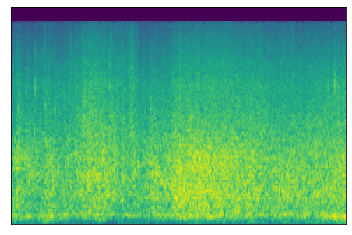

In [11]:
librosa.display.specshow(spec_to_image(get_melspectrogram_db(filepath, sr)), cmap='viridis')
#plt.savefig('testplot.jpg')
plt.savefig("out.jpg")
plt.show()


### Get the list of audio files from ESC-50-master

In [14]:
df = pd.read_csv('ESC-50-master/meta/esc50.csv')
train = df[df['fold']!=5]
valid = df[df['fold']==5]
display(df.loc[df['category']=='rain'])

,filename,fold,target,category,esc10,src_file,take
62,1-17367-A-10.wav,1,10,rain,True,17367,A
107,1-21189-A-10.wav,1,10,rain,True,21189,A
140,1-26222-A-10.wav,1,10,rain,True,26222,A
152,1-29561-A-10.wav,1,10,rain,True,29561,A
238,1-50060-A-10.wav,1,10,rain,True,50060,A
276,1-54958-A-10.wav,1,10,rain,True,54958,A
281,1-56311-A-10.wav,1,10,rain,True,56311,A
313,1-63871-A-10.wav,1,10,rain,True,63871,A
402,2-101676-A-10.wav,2,10,rain,True,101676,A
493,2-117625-A-10.wav,2,10,rain,True,117625,A


#### Genereate Training Files

In [ ]:
category_list = ['wind', 'rain', 'thunderstorm']
for category in category_list:
    df_selected = df.loc[df['category']==category]
    for index, row in df_selected.iterrows():
        print(index)
        file_name = row['filename']
        path =f"ESC-50-master/audio/{file_name}"
        wav, sr = librosa.load(path, sr=None)
        
        ### Generate the spectrogram_db
        librosa.display.specshow(spec_to_image(get_melspectrogram_db(path, sr)), cmap='viridis')

        plt.savefig(f"training/{category}/{file_name}.jpg")



### Custom Vision Prediction

In [ ]:
%env ProjectID=
%env ModelName= 
%env AZURE_COG_SERVICE_ENDPOINT= 
%env AZURE_COG_SERVICEE_KEY= 

In [103]:
from azure.cognitiveservices.vision.customvision.prediction import CustomVisionPredictionClient
from msrest.authentication import ApiKeyCredentials
import os

def main():
    from dotenv import load_dotenv

    try:
        # Get Configuration Settings
        load_dotenv()
         
        prediction_endpoint = os.environ["AZURE_COG_SERVICE_ENDPOINT"] 
        prediction_key = os.environ["AZURE_COG_SERVICEE_KEY"]
        project_id = os.environ['ProjectID']
        model_name = os.getenv('ModelName')
        print(model_name)
        # Authenticate a client for the training API
        credentials = ApiKeyCredentials(in_headers={"Prediction-key": prediction_key})
        prediction_client = CustomVisionPredictionClient(endpoint=prediction_endpoint, credentials=credentials)

        # Classify test images
        test_image_path = 'testing'
        for image in os.listdir(test_image_path):
            if image.endswith(".jpg"):
                image_data = open(os.path.join(test_image_path,image), "rb").read()
                results = prediction_client.classify_image(project_id, model_name, image_data)

                # Loop over each label prediction and print any with probability > 50%
                for prediction in results.predictions:
                    if prediction.probability > 0.5:
                        print(image, ': {} ({:.0%})'.format(prediction.tag_name, prediction.probability))
    except Exception as ex:
        print(ex)

if __name__ == "__main__":
    main()


Iteration1
1-101296-A-19.wav.jpg : thunderstorm (70%)
1-137296-A-16.wav.jpg : wind (97%)
1-17367-A-10.wav.jpg : rain (95%)
